<a href="https://colab.research.google.com/github/OluPaul22/gis/blob/main/PS_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

# Lagos, Nigeria

This is the map of Lagos, Nigeria, describing the Local Government Areas of the state.

In [25]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nigeria-lgas.zip https://docs.google.com/uc?id=1-9HhtfawWddxoRx1GTtyHsSO-y0t58eM&export=download

zip_ref = zipfile.ZipFile('nigeria-lgas.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
ngr=gpd.read_file('new_lga_nigeria_2003.shp') #load the shapefile with gpd as njC

<Axes: >

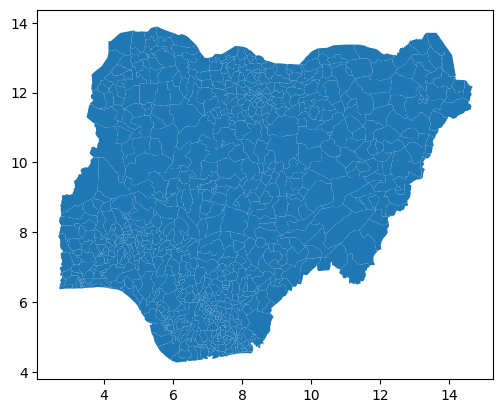

In [26]:
#make the map
ngr.plot()

<Axes: >

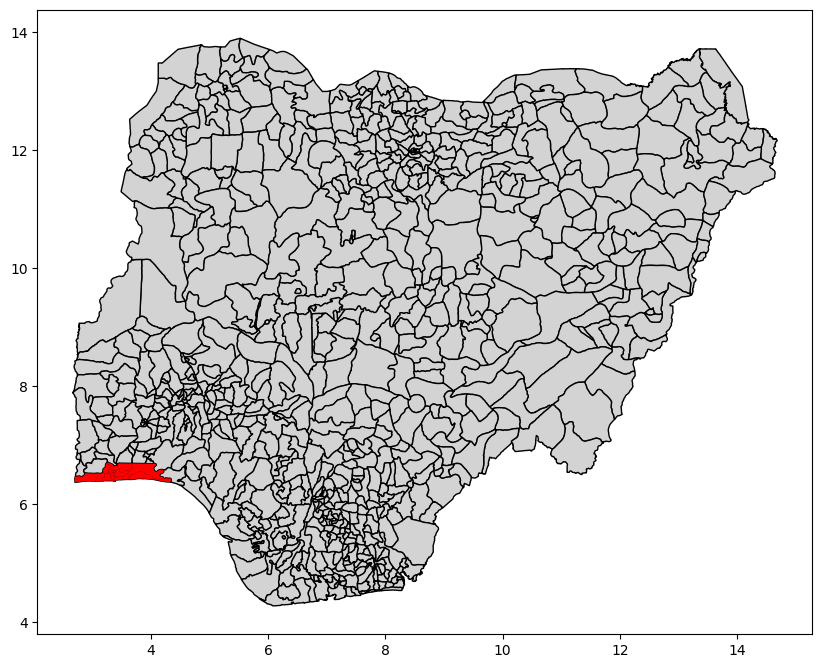

In [35]:
# 1. First, identify the column that contains county names in your shapefile.
# Check the first few rows to understand the structure of the data.
#ngr.head()
# 2. Filter out the county you want to highlight, for example, let's highlight 'Salem County'
highlighted_state = ngr[ngr['STATE'] == 'Lagos']
# 3. Plot the base map of all counties
ax = ngr.plot(color='lightgrey', edgecolor='black', figsize=(10, 10))
# 4. Overlay the selected county with a different color (e.g., red for highlight)
highlighted_state.plot(ax=ax, color='red')
# 6. Show the plot
plt.show()

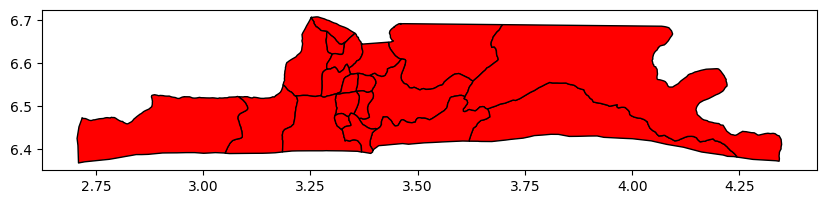

In [28]:
# 1. Filter out only Lagos State from the shapefile data
lagos_state = ngr[ngr['STATE'] == 'Lagos']

# 2. Plot the map of Lagos State
ax = lagos_state.plot(color='red', edgecolor='black', figsize=(10, 10))

# 3. Show the plot
plt.show()

In [38]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O NJ_SchDist.zip https://docs.google.com/uc?id=1w0OpeXHuQLYMzAcXz9frpr2At4ou3RdI&export=download

zip_ref = zipfile.ZipFile('NJ_SchDist.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njschdist=gpd.read_file('tl_2020_34_scsd.shp') #load the shapefile with gpd as njC

<Axes: >

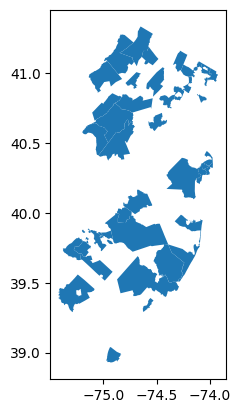

In [39]:
#make the map
njschdist.plot()

# PS 0

I would love to study resources are being allocated to fund K-12 and how that impacts academic performance. I would also love to see the effects of household income, educational level, racial/ethnic composition, among others.

In [42]:
#Camden County Map by Zip Codes
! wget -q -O CamCounty_ZipCode.zip https://docs.google.com/uc?id=1i9D-XX2kKX91PB_4hvxtV8nQWJwYD4Zx&export=download

zip_ref = zipfile.ZipFile('CamCounty_ZipCode.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
Camden=gpd.read_file('Zip_Codes.shp') #load the shapefile with gpd as njC


<Axes: >

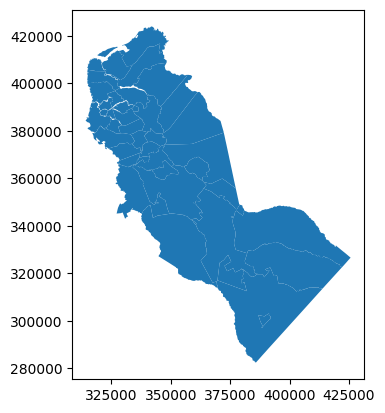

In [43]:
#make the map
Camden.plot()

This is the map of Camden county by Zip codes.

source: https://camdencountynj-ccdpw.opendata.arcgis.com/datasets/fd89972033b34092a7544ebbe2c894fa_0/explore?location=39.909001%2C-75.073693%2C12.84

## Schools in Camden County

In [ ]:
#The point locations of private, public and charter schools in Camden county, NJ
! wget -q -O Camden_Schools.zip https://docs.google.com/uc?id=119EGHtBVnX41qhdBtmrGeObS_Ov4Hcfk&export=download

zip_ref = zipfile.ZipFile('Camden_Schools.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
cmdsch=gpd.read_file('Schools.shp') #load the shapefile with gpd as njC

<Axes: >

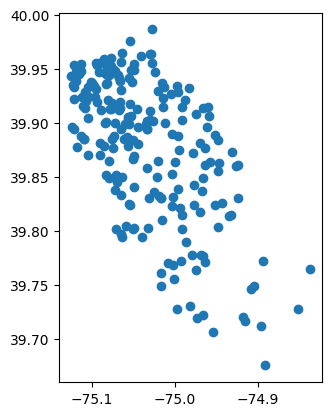

In [ ]:
#make the map
cmdsch.plot()

In [54]:
cmdsch.head(2)

,OBJECTID_1,OBJECTID,COUNTYCODE,COUNTY,DIST_CODE,DIST_NAME,SCHOOLCODE,SCHOOLTYPE,SCHOOL,ADDRESS1,...,SOURCE,ZIP_TRUNC,PREF_ID_NU,GNIS_ID,LOC_QUAL,OGIS_ID,CATEGORY,SCHOOLNAME,LAST_UPDAT,geometry
0,1,2512,07,CAMDEN,0580,Brooklawn Public School District,010,ELEMENTARY SCHOOL,ALICE COSTELLO E.S.,301 Haakon rd.,...,PUBLIC,08030,0580-010-07,None,H,07-0580-010,3,Alice Costello Elementary School,2017-03-02,POINT (-75.11856 39.87817)
1,2,2513,07,CAMDEN,0680,Camden City Public Schools,301,ELEMENTARY SCHOOL,HENRY L. BONSALL FAMILY SCHOOL,1575 Mount Ephraim Avenue,...,PUBLIC,08104,0680-301-07,None,H,07-0680-301,3,Bonsall Elementary School,2017-03-02,POINT (-75.106 39.9254)


School types in the data: ['PUBLIC' None 'CHARTER' 'PRIVATE']


<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'School Types by Category in Camden\n(Total Schools: 225)')

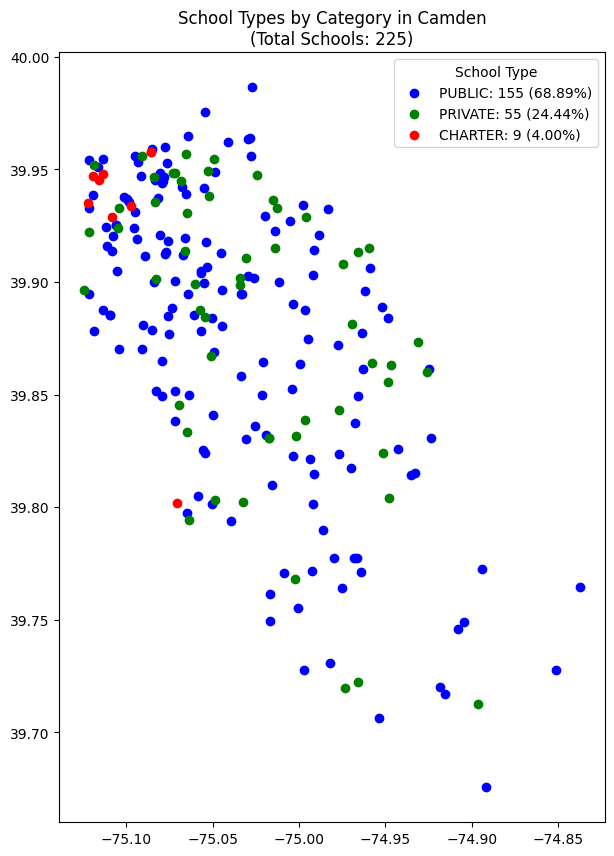

In [56]:
# 1. Load the shapefile (assuming you have the correct path to the shapefile)
cmdsch = gpd.read_file('Schools.shp')

# 2. Check the unique values in the 'SOURCE' column (i.e., school types)
school_types = cmdsch['SOURCE'].unique()
print("School types in the data:", school_types)

# 3. Define a color map for different school types
color_map = {
    'PUBLIC': 'blue',
    'PRIVATE': 'green',
    'CHARTER': 'red',
    # Add more colors for other categories if needed
}

# 4. Calculate the total number of schools
total_schools = len(cmdsch)

# 5. Create an empty list to store the legend labels with counts and percentages
legend_labels = []

# 6. Plot the shapefile with different colors based on the 'SOURCE' column
fig, ax = plt.subplots(figsize=(10, 10))

for school_type, color in color_map.items():
    # Filter the GeoDataFrame for each school type
    school_type_data = cmdsch[cmdsch['SOURCE'] == school_type]

    # Count the number of schools in this category
    count = len(school_type_data)

    # Calculate the percentage
    percentage = (count / total_schools) * 100

    # Plot each school type with its respective color
    school_type_data.plot(ax=ax, color=color, label=school_type)

    # Add the label with count and percentage to the list
    legend_labels.append(f"{school_type}: {count} ({percentage:.2f}%)")

# 7. Add a legend with the updated labels (with counts and percentages)
plt.legend(legend_labels, title="School Type")
plt.title(f"School Types by Category in Camden\n(Total Schools: {total_schools})")
plt.show()



This just shows that there is a total number of 225 in camden and gave a breakdown of the numbers and percentages. With the school type categorization showing a total of 219 schools, it means the categories that 6 of the schools fall under are unknown.

I guess schools are my unit of analysis

Source: https://camdencountynj-ccdpw.opendata.arcgis.com/datasets/1fec6ca6c9e64104a420f87cdf64b3b9_0/explore
